In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0, '../')
os.chdir('../')

In [61]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite as comp
import matplotlib.gridspec as gridspec
import kaepora as kpora
import kaepora_plot as kplot

In [4]:
%matplotlib inline

In [41]:
# query_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and (dm15_source > 0 or dm15_from_fits > 0) and NED_host between 1 and 9",
#              "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and (dm15_source > 0 or dm15_from_fits > 0) and NED_host >= 10"]
query_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where NED_host between 1 and 9 and (dm15_source > 0 or dm15_from_fits > 0) and phase between -100 and 10",
             "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where NED_host >= 10 and (dm15_source > 0 or dm15_from_fits > 0) and phase between -100 and 10"]

In [42]:
# SN_Array_E = kpora.grab(query_max[0], multi_epoch = True, make_corr = True)
# SN_Array_S = kpora.grab(query_max[0], multi_epoch = True, make_corr = True)

In [85]:
# comps, sn_arrays, boot_sn_arrays = query_db.main(len(query_max), query_max, boot='b', medmean=1, selection = 'max_coverage', verbose=False, gini_balance=True)
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(query_max, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where NED_host between 1 and 9 and (dm15_source > 0 or dm15_from_fits > 0) and phase between -100 and 10
400 Total Spectra found
30 flagged spectra removed 370 spectra left
0 spectra of peculiar Ias removed 370 spectra left
337 spectra of SNe that have host reddening corrections
Arrays cleaned
337 spectra may have telluric contamination
58 total SNe
removed spectra of SNe with A_V > 2.0
Using 337 spectra of 58 SNe
Gini balancing...
Balanced after 21 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where NED_host >= 10 and (dm15_source > 0 or dm15_from_fits > 0) and phase between -100 and 10
1079 Total Spectra found
26 flagged spectra removed 1053 spectra left
21 spectra of peculiar Ias removed 1032 spectra left
928 spectra of SNe that have host reddening corrections
Arrays cleaned
928 spectra may have telluric contamination
145 total SNe
removed spectra of SNe with A_V > 

In [199]:
SN_Array_E = copy.deepcopy(sn_arrays[0])
SN_Array_S = copy.deepcopy(sn_arrays[1])
for SN in SN_Array_E:
    if SN.ned_host is None:
        print SN.name
for SN in SN_Array_S:
    if SN.ned_host is None:
        print SN.name

In [200]:
dm15s_E = []
dm15s_S = []
weights_E = []
weights_S = []

for SN in SN_Array_E:
    print SN.name,  np.nanmean(SN.ivar[SN.x1:SN.x2])
    if SN.dm15_source != None:
        dm15s_E.append(SN.dm15_source)
        weights_E.append(np.nanmean(SN.ivar[SN.x1:SN.x2]))
    elif SN.dm15_from_fits != None:
        dm15s_E.append(SN.dm15_from_fits)
        weights_E.append(np.nanmean(SN.ivar[SN.x1:SN.x2]))
    elif SN.dm15 != None:
        dm15s_E.append(SN.dm15)
        weights_E.append(np.nanmean(SN.ivar[SN.x1:SN.x2]))
        
for SN in SN_Array_S:
#     plt.plot(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2])
#     plt.show()
#     print SN.dm15_source, SN.dm15_from_fits, SN.dm15
    print SN.name,  np.nanmean(SN.ivar[SN.x1:SN.x2])
    if SN.dm15_source != None:
        dm15s_S.append(SN.dm15_source)
        weights_S.append(np.nanmean(SN.ivar[SN.x1:SN.x2]))
    elif SN.dm15_from_fits != None:
        dm15s_S.append(SN.dm15_from_fits)
        weights_S.append(np.nanmean(SN.ivar[SN.x1:SN.x2]))
    elif SN.dm15 != None:
        dm15s_S.append(SN.dm15)
        weights_S.append(np.nanmean(SN.ivar[SN.x1:SN.x2]))

1994d_combined 228224.42872123013
2006mr_combined 113225.86483832521
1995d_combined 210950.86460950642
2003ic_combined 9791.691816549715
1998de_combined 30831.679362843115
1994m_combined 21139.503989994613
2008r_combined 219519.5031317475
2005cf_combined 116276.9400529781
2006kf_combined 532953.0754067409
1994t_combined 1410.5228506261508
1996x_combined 59836.78599599426
1998dx_combined 48507.055876355946
1998bp_combined 207278.932220674
2003ch_combined 468427.953072464
2007on_combined 393228.43512070744
2008fp_combined 461810.1263837121
2007au_combined 53871.227358277545
2004gs_combined 82134.78046325034
2007ax_combined 35291.163278922955
1999da_combined 140493.64394633446
2006ej_combined 485092.9353767962
2006em_combined 4601.277611690267
2005el_combined 396061.3056954798
2005ki_combined 252769.11167902773
1997bp_combined 350100.1516176286
1991bg_combined 66811.02914690465
2002dj_combined 410930.0550777015
1998co_combined 83286.79392031494
1999gh_combined 314068.5882064985
2008hv_com

1.0957444786400146
1.4568167438336617

1.0818122561649794
1.3525606124936842


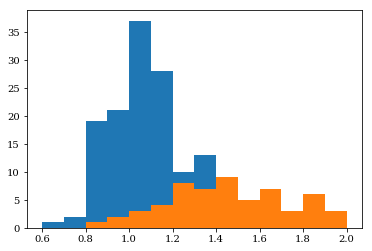

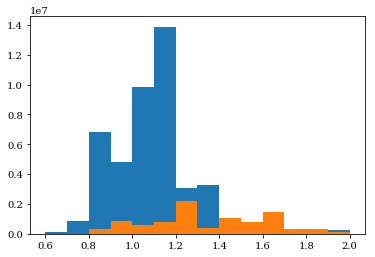

In [201]:
print np.nanmean(dm15s_S)
print np.average(dm15s_E)
print
print np.average(dm15s_S, weights=weights_S)
print np.average(dm15s_E, weights=weights_E)

bins = np.linspace(.6,2.,num = 15, retstep=True)[0]
n_S, bins_S, patches = plt.hist(dm15s_S, bins=bins)
n_E, bins_E, patches = plt.hist(dm15s_E, bins=bins)
plt.show()
n_Sw, bins_Sw, patches = plt.hist(dm15s_S, bins=bins, weights=weights_S)
n_Ew, bins_Ew, patches = plt.hist(dm15s_E, bins=bins, weights=weights_E)
plt.show()

In [202]:
from scipy.optimize import curve_fit
import copy

In [203]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [204]:
centers = (bins_Ew[:-1] + bins_Ew[1:])/2.
# popt_S,pcov_S = curve_fit(gaus,centers,n_S,p0=[1,np.average(dm15s_S),np.std(dm15s_S)])
# popt_E,pcov_E = curve_fit(gaus,centers,n_E,p0=[1,np.average(dm15s_E),np.std(dm15s_E)])
popt_S,pcov_S = curve_fit(gaus,centers,n_Sw,p0=[1e7,np.average(dm15s_S),np.std(dm15s_S)])
popt_E,pcov_E = curve_fit(gaus,centers,n_Ew,p0=[1e7,np.average(dm15s_E),np.std(dm15s_E)])

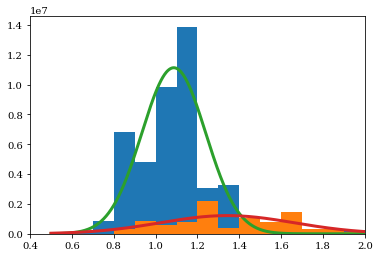

In [205]:
bins = np.linspace(.6,2.,num = 15, retstep=True)[0]
x = np.linspace(.5,2.2, num=1000)
# n_S, bins_S, patches = plt.hist(dm15s_S, bins=bins)
# n_E, bins_E, patches = plt.hist(dm15s_E, bins=bins)
n_S, bins_S, patches = plt.hist(dm15s_S, bins=bins, weights=weights_S)
n_E, bins_E, patches = plt.hist(dm15s_E, bins=bins, weights=weights_E)
gaus_S = gaus(x,*popt_S)
gaus_E = gaus(x,*popt_E)
plt.plot(x,gaus_S, linewidth=3)
plt.plot(x,gaus_E, linewidth=3)
plt.xlim([.4,2.])
plt.show()

[531 532 533 534 535 536 537 538]
1.1716738282823902
0.5319404358264341


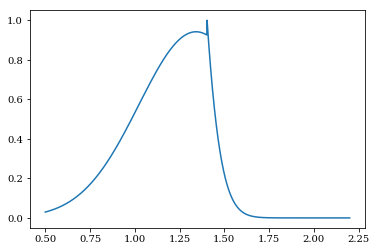

In [211]:
# inds_eq = np.where((np.absolute(gaus_S - gaus_E) < 10e-2) & (gaus_S > .3))[0]
inds_eq = np.where((np.absolute(gaus_S - gaus_E) < 1e5) & (gaus_S > .1e7))[0]
print inds_eq
func = np.concatenate((gaus_E[:inds_eq[0]], gaus_S[inds_eq[0]:]))
func = func/np.amax(func)
print np.average(x, weights = func)
print np.interp(1., x, func)
plt.plot(x, func)
plt.show()

In [212]:
for SN in SN_Array_E:
    if SN.dm15_source != None:
        scale = np.interp(SN.dm15_source, x, func)
        print 'E: ', SN.dm15_source, scale
    elif SN.dm15_from_fits != None:
        scale = np.interp(SN.dm15_from_fits, x, func)
        print 'E: ', SN.dm15_from_fits, scale
    elif SN.dm15 != None:
        scale = np.interp(SN.dm15, x, func)
        print 'E: ', SN.dm15, scale
    SN.ivar = SN.ivar*scale

for SN in SN_Array_S:
    if SN.dm15_source != None:
        scale = np.interp(SN.dm15_source, x, func)
        print 'S: ', SN.dm15_source, scale
    elif SN.dm15_from_fits != None:
        scale = np.interp(SN.dm15_from_fits, x, func)
        print 'S: ', SN.dm15_from_fits, scale
    elif SN.dm15 != None:
        scale = np.interp(SN.dm15, x, func)
        print 'E: ', SN.dm15, scale
    SN.ivar = SN.ivar*scale

E:  1.37 0.9382514652822787
E:  1.9163719273424464 3.406687267135173e-06
E:  1.0500000000000003 0.6210074078692627
E:  1.3068653534087529 0.9361576187433177
E:  1.8799999999999992 1.2055961047191468e-05
E:  1.26 0.9113726221666713
E:  1.5399999999999998 0.1054492718313947
E:  1.1 0.7075018445946283
E:  1.55 0.08665199596503467
E:  1.5100000000000005 0.1851966333255254
E:  1.2600000000000002 0.9113726221666714
E:  1.32 0.9396013819206719
E:  1.7899999999999996 0.00021572435667463415
E:  1.2200000000000002 0.8757562828171314
E:  1.6410642282933745 0.011912036956085626
E:  0.9793008064190224 0.4953659842857336
E:  1.6900000000000002 0.0035409509429018843
E:  1.41 0.9160828634267975
E:  1.8700000000000003 1.689843460631238e-05
E:  1.8999999999999997 6.060176017758673e-06
E:  1.2665917425706918 0.9160048844981987
E:  1.5 0.22152909151363168
E:  1.27 0.9182564710840443
E:  1.4100000000000001 0.9160828634267947
E:  1.0800000000000003 0.6735157696414057
E:  1.8268286491759538 6.911834534256475

In [213]:
# ratio = gaus_S/gaus_E
# ratio_S = copy.deepcopy(ratio)
# inds_S = np.where(ratio < 1)
# ratio_S[inds_S] = 1.
# ratio_E = copy.deepcopy(ratio)
# inds_E = np.where(ratio > 1)
# ratio_E[inds_E] = 1.
# plt.plot(x,ratio_S)
# plt.plot(x,ratio_E)
# plt.xlim([.5,1.5])
# plt.ylim([0,20])
# plt.show()

In [214]:
# print np.interp(1.0, x, ratio_S)
# print np.interp(1.0, x, ratio_E)

In [215]:
# for SN in SN_Array_E:
#     if SN.dm15_source != None:
#         scale = np.interp(SN.dm15_source, x, ratio_E)
#         print 'E: ', SN.dm15_source, scale
#     elif SN.dm15_from_fits != None:
#         scale = np.interp(SN.dm15_from_fits, x, ratio_E)
#         print 'E: ', SN.dm15_from_fits, scale
#     elif SN.dm15 != None:
#         scale = np.interp(SN.dm15, x, ratio_E)
#         print 'E: ', SN.dm15, scale
#     SN.ivar = SN.ivar*scale

# for SN in SN_Array_S:
#     if SN.dm15_source != None:
#         scale = np.interp(SN.dm15_source, x, ratio_S)
#         print 'S: ', SN.dm15_source, scale
#     elif SN.dm15_from_fits != None:
#         scale = np.interp(SN.dm15_from_fits, x, ratio_S)
#         print 'S: ', SN.dm15_from_fits, scale
#     elif SN.dm15 != None:
#         scale = np.interp(SN.dm15, x, ratio_S)
#         print 'E: ', SN.dm15, scale
#     SN.ivar = SN.ivar*scale

In [216]:
template_E = comp.spectrum()
template_S = comp.spectrum()

In [221]:
lengths_E = []
for SN in SN_Array_E:
    lengths_E.append(len(SN.flux[SN.x1:SN.x2]))
temp = [SN for SN in SN_Array_E if len(SN.flux[SN.x1:SN.x2]) == max(lengths_E)]
test = temp[0]
template_E = copy.deepcopy(test)
template_E.spec_bin = comp.spectra_per_bin(SN_Array_E)
template_E, boots_E = comp.create_composite(SN_Array_E, False, template_E, 1, gini_balance=False)

lengths_S = []
for SN in SN_Array_S:
    lengths_S.append(len(SN.flux[SN.x1:SN.x2]))
temp = [SN for SN in SN_Array_S if len(SN.flux[SN.x1:SN.x2]) == max(lengths_S)]
test = temp[0]
template_S = copy.deepcopy(test)
template_S.spec_bin = comp.spectra_per_bin(SN_Array_S)
template_S, boots_E = comp.create_composite(SN_Array_S, False, template_S, 1, gini_balance=False)

Phase:  1.5874839854123934
dm15:  1.3056791097864864
Redshift:  0.015543030208594147
Morphology:  6.475098884326218
Phase:  -0.17948596807241188
dm15:  1.0854721637887415
Redshift:  0.01568902109043505
Morphology:  13.206308217581308


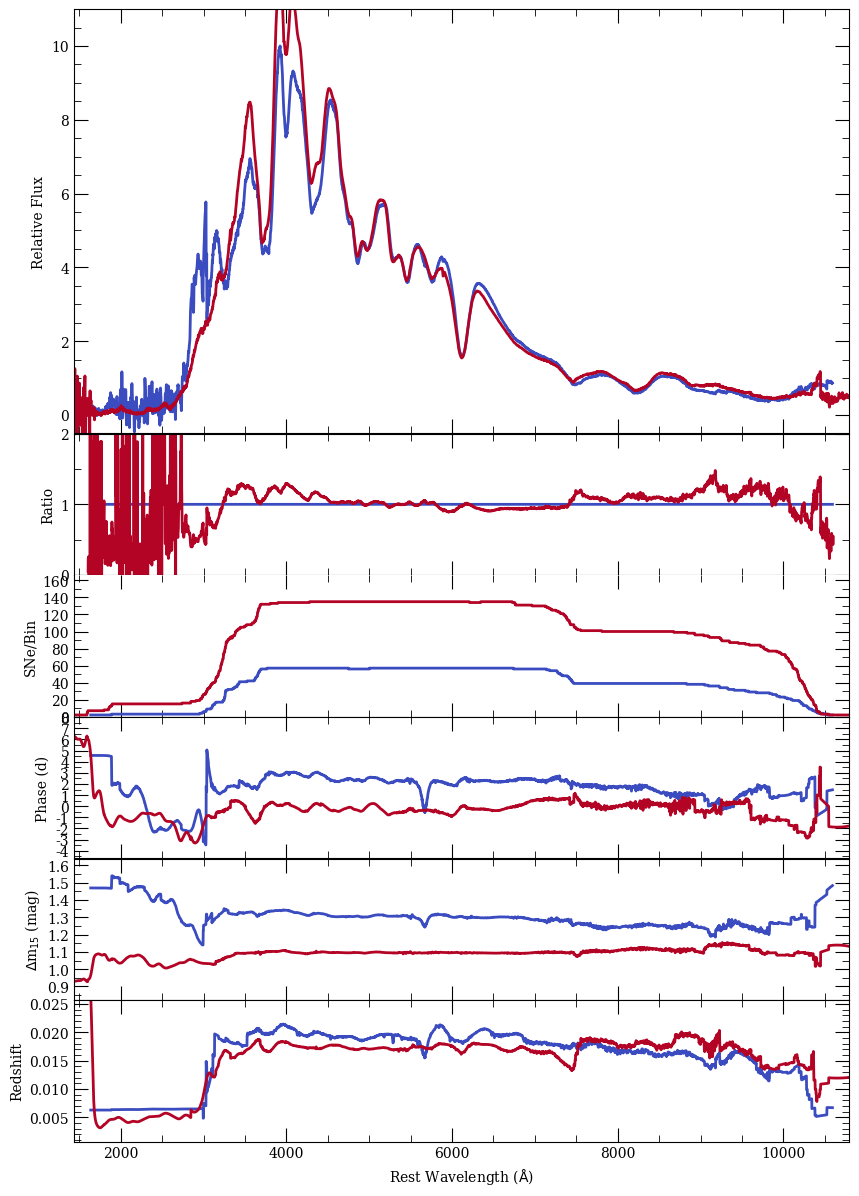

In [222]:
kplot.comparison_plot([template_E, template_S], scale_type=False, min_num_show=2)

In [223]:
query_phase = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -100 and 10"]

In [224]:
SN_Array_phase = kpora.grab(query_phase[0], multi_epoch = True, make_corr = True)

Using: ../data/kaepora_v1.db
1972 Total Spectra found
67 flagged spectra removed 1905 spectra left
36 spectra of peculiar Ias removed 1869 spectra left
1516 spectra of SNe that have host reddening corrections
Arrays cleaned


In [295]:
params = []
weights = []
SN_Array_p = copy.deepcopy(SN_Array_phase)
for SN in SN_Array_p:
    print SN.name,  np.nanmean(SN.ivar[SN.x1:SN.x2])
    params.append(SN.phase)
    weights.append(np.nanmean(SN.ivar[SN.x1:SN.x2]))

1990n 990760.3285225257
1991bg 227625.78259184366
1991bg 166131.39280394596
1991t 3411898.5129283676
1991t 465897.4792181167
1991t 697239.1744682002
1994d 478736.08076271054
1994d 156296.71964668657
1994d 1003620.4295508013
1994d 4213842.221121031
1994d 836474.627927155
1994d 492413.93616380636
1994d 1360498.1710528834
1994d 2426138.289132808
1994q 31554.662875116675
1994s 262855.92787191574
1995ac 30806.25045106588
1995d 1388480.19659427
1995e 36992.64966253529
1997bp 278169.22183989605
1997br 443287.90219564264
1997do 1517999.8052485995
1997y 169974.51012083763
1998dk 122807.7645913973
1998dk 1372558.1801206316
1998dm 169369.1874096292
1998dm 1157287.7418252863
1998dx 69490.09301715178
1998ef 165426.20223406635
1998es 1176929.9604892626
1998v 4629849.114423752
1999aa 119886.2533443409
1999aa 378003.80078508594
1999ac 1388892.289810887
1999ac 1833471.4711978245
1999cl 2075.650336607629
1999cp 2519539.0222823205
1999da 77523.4183469845
1999da 31563.796330491965
1999dk 947463.1656154185

1999gp 20231.239420902933
1999gp 9377.938614527977
2000b 21327.25028150732
2000ce 2052.1999315140206
2000ce 2752.0504290081535
2000cf 10405.462931073944
2000cf 13399.472080750194
2000cn 11646.332469148074
2000cn 6762.724818052681
2000cn 11103.507796852007
2000cn 4510.902983358194
2000dk 31528.051232144247
2000dk 52032.17165225664
2000dk 43435.469065649784
2000dk 22193.784300216255
2000dk 36410.6384474142
2000fa 31595.893378307865
2000fa 11364.99838014155
2000fa 14330.53121997496
2000fa 18969.621774584637
2000fa 18202.89753416268
2000fa 13657.978300499852
2001ah 5039.663147711139
2001ah 4832.584405527083
2001ay 11336.67007875221
2001ay 11399.723823502947
2001ay 19843.467310092234
2001ay 229000.64650900656
2001ay 14726.483684812534
2001ay 16169.889734329578
2001az 10293.870472822582
2001bf 109654.50861832072
2001bf 148866.615232487
2001bf 112584.34645478538
2001cp 10090.626249707815
2001cp 18571.89437418556
2001cp 58316.56580269685
2001cp 30624.19169080862
2001cp 30193.881092463096
2001d

2006x 128819.56937409555
2006x 101474.68833580402
2006x 74902.62681242869
2006x 118038.27549589041
2006x 109946.89949657502
2007a 41939.74891768496
2007a 74422.67185512098
2007a 33373.260155279066
2007ae 3178.1356087399568
2007ae 1201.2288912037939
2007af 338020.2019435864
2007af 781419.2283575659
2007af 729471.6791773333
2007af 374675.5239890741
2007af 642571.962504614
2007af 821318.3727278123
2007af 742375.625106432
2007af 781415.8330038774
2007af 761241.8841849677
2007af 226949.32345295002
2007af 554240.5088961836
2007al 5523.953340553259
2007al 7329.968578565852
2007al 7930.593246396043
2007al 6305.262438772992
2007al 4945.333289652724
2007ap 71386.45042857697
2007au 24997.921885033356
2007au 20311.045169860194
2007au 15810.985518851756
2007au 6268.420626012135
2007ax 12043.716173554874
2007ax 9589.454106061556
2007ba 3691.3631025609225
2007bc 54239.593579880275
2007bc 25303.5460313786
2007bc 33681.909232154416
2007bc 32414.905715726054
2007bd 5533.292111122842
2007bd 4498.35962552

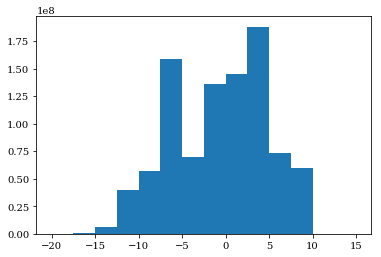

In [297]:
bins = np.linspace(-20,15,num = 15, retstep=True)[0]
n_pw, bins_pw, patches = plt.hist(params, bins=bins, weights=weights)
plt.show()

In [298]:
def gaus_fixed_sig(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [299]:
centers = (bins[:-1] + bins[1:])/2.
# popt_S,pcov_S = curve_fit(gaus,centers,n_S,p0=[1,np.average(dm15s_S),np.std(dm15s_S)])
# popt_E,pcov_E = curve_fit(gaus,centers,n_E,p0=[1,np.average(dm15s_E),np.std(dm15s_E)])
popt_pw,pcov_pw = curve_fit(gaus_fixed_sig,centers,n_pw,p0=[1e7,np.average(params), np.std(params)], 
                            bounds = ((-np.inf,-np.inf, -np.inf), (np.inf,np.inf, np.inf)))
print popt_pw

[ 1.53644045e+08 -8.13551551e-02  6.30186184e+00]


In [300]:
x = np.linspace(-20,15, num=1000)
gaus_pw = gaus(x,*popt_pw)

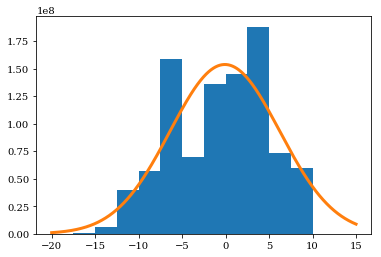

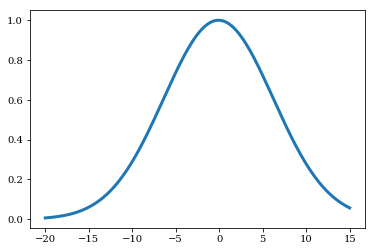

In [301]:
n_pw, bins_pw, patches = plt.hist(params, bins=bins, weights=weights)
plt.plot(x,gaus_pw, linewidth=3)
plt.show()
gaus_pw = gaus_pw/np.amax(gaus_pw)
plt.plot(x,gaus_pw, linewidth=3)
plt.show()

In [302]:
for SN in SN_Array_p:
    scale = np.interp(SN.phase, x, gaus_pw)
    print SN.phase, scale
    SN.ivar = SN.ivar*scale

7.33808719397 0.5000427526793558
0.681687715271 0.9926964195551878
1.67830718204 0.9617664237512698
-9.66304132767 0.31477890588915114
-8.66879898507 0.39516703393385466
7.23907849643 0.5093154111866414
-12.5601512088 0.1407830857017082
-11.5622049821 0.1902334026277593
-9.56631252882 0.32217428646403257
-7.92568893218 0.4608355638622611
-6.57247384882 0.5883228980256928
-5.57452762216 0.683925965459392
-4.11852407745 0.8144821930244763
-3.57863516883 0.8572814190093337
9.95955569542 0.2810183182757991
0.998840596273 0.9854167186431807
-5.84826509087 0.6578937186026017
3.67091512586 0.8375595240751729
-2.1768034995 0.946218555465553
6.22327216179 0.6062665207203821
-4.41866036556 0.7891115427869372
-5.80525086128 0.6620003720472715
2.77201914426 0.9025754193178422
-7.42682480293 0.506966004464846
-0.728371655089 0.9947455979438793
-11.7372967656 0.1807741149370453
-4.86520587957 0.7496670802554551
4.7115224089 0.7488505518647098
-8.52180611589 0.40781807641797885
0.496750833938 0.99580

5.42762950512 0.6824296509479559
6.27145324877 0.6016293748646647
7.25106472128 0.5081901506902119
8.23067619379 0.41901473697954156
-1.51219106103 0.974553803187888
4.16831940139 0.7966233485929212
7.24363023795 0.5088880960828427
-8.02145521031 0.45214755888770797
-7.003011683 0.5470669574060935
-6.13975955033 0.6299526933513826
-5.14071494736 0.7245026442382881
-4.10287249572 0.8157768033337753
-3.19112305223 0.8853660571495761
-1.34822524091 0.979995908071859
-0.261885478447 0.9995894498854839
0.746858586688 0.9914022381160145
1.64890856802 0.9630110840409263
2.62855424667 0.911689887800297
6.45014233961 0.584440752733755
-6.4188820959 0.6031001050780791
-5.4280080459 0.6977399076601628
-3.4561686864 0.8664137136661445
2.3998969491 0.925415398107354
3.4304059611 0.856186866075166
4.40146253009 0.7764627163045308
-2.48387960191 0.9299083072774896
-0.498333211665 0.9978130979667444
0.484706912913 0.995973972601551
2.40212180938 0.9252865399405319
3.33649658126 0.8632313953116925
4.32

In [305]:
template_p = comp.spectrum()
lengths_p = []
for SN in SN_Array_p:
    lengths_p.append(len(SN.flux[SN.x1:SN.x2]))
temp = [SN for SN in SN_Array_p if len(SN.flux[SN.x1:SN.x2]) == max(lengths_p)]
test = temp[0]
template_p = copy.deepcopy(test)
template_p.spec_bin = comp.spectra_per_bin(SN_Array_p)
template_p, boots_p = comp.create_composite(SN_Array_p, False, template_E, 1, gini_balance=True)

KeyboardInterrupt: 

Phase:  -0.33670775990089213
dm15:  1.1455238635301974
Redshift:  0.004668521557062046
Morphology:  12.52182528445881


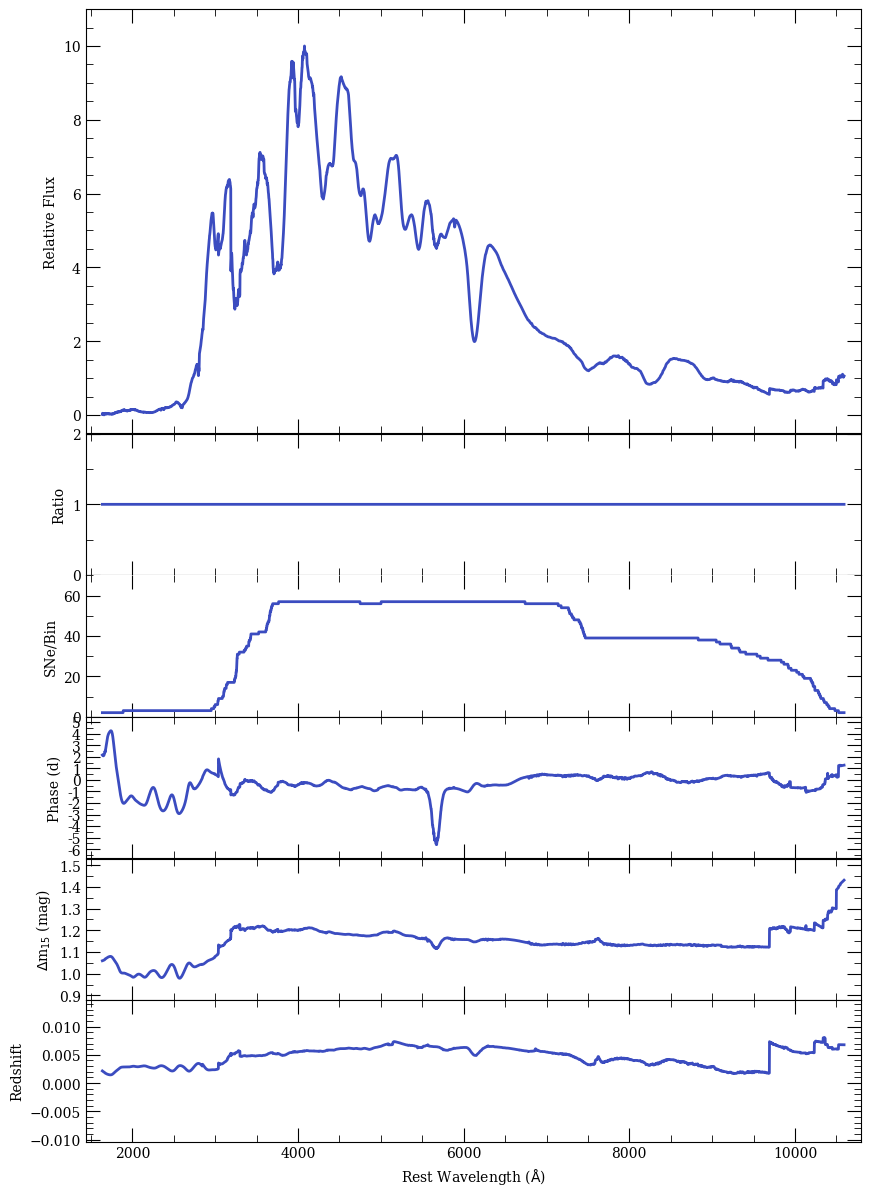

In [304]:
kplot.comparison_plot([template_p], scale_type=False, min_num_show=2)